# Текущий контроль успеваемости 3

<a href="https://colab.research.google.com/github/dm-fedorov/python_basic/blob/master/gsom/03/Текущий_контроль_03.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Нас всюду окружает текст.

В этом Блокноте вам предстоит погрузиться в мир настоящего анализа текстовых данных. 

Успехов в этом интересном деле!

В сумме можно набрать `15 баллов`:

1) `+2 балла` за оформление Блокнота: наличие комментариев в стиле Python (после `#`) или разметки [markdown](https://www.markdownguide.org/basic-syntax/)

2) `+13 баллов` по сумме заданий

3) если загружаете позже обозначенного срока, то `-3 балла`

4) здесь напоминаю про самостоятельное выполнение работы, но вы и так это знаете.

## Задание 1 (5 балла), средний уровень

Разработайте собственный класс для работы с файлами.

Интерфейс работы с классом имеет следующий вид:

```Python
file = MyFile("text.txt", "read")
text = file.read() # происходит чтение в виде str
print(text)

file = MyFile("text.txt", "write")
text = file.write("привет!") # происходит запись строки в файл

file = MyFile("text.txt", "append")
text = file.write("привет!") # происходит добавление строки в конец файла

# указали URL
file = MyFile("https://blog.dfedorov.spb.ru", "url") 
# и может читать содержимое страницы по указанному URL
text = file.read_url() # происходит чтение в виде str
print(text)

# возвращает кол-во url адресов на странице, например, методом count 
count = file.count_urls()
print(count)

# происходит запись содержимого страницы по URL в указанный файл
file.write_url("text.txt") 
```

Выполните обработку возможных ошибок.

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from lxml import html
from requests import get
from pprint import pprint
import re
from datetime import datetime as dt

In [2]:
class MyFile:
    
    def __init__(self, text, obj):
        self.text = text
        self.obj = obj
    
    # происходит чтение в виде str
    def read(self):
        if self.obj == 'read':
            self.f = open(self.text, 'r')
            l = [line.strip() for line in self.f]
            str1 = ''.join(str(e) for e in l)
            self.f.close()
            return str1
    

    def write(self, argument):
        self.argument = argument
        
        # происходит запись строки в файл
        if self.obj == 'write':
            self.f = open(self.text, 'w')
            self.f.write(self.argument)
            self.f.close()
            
        # происходит добавление строки в конец файла    
        elif self.obj == 'append':
            self.f = open(self.text, 'a+')
            self.f.write(f'\n{self.argument}')
            self.f.close()
    
    # чтение содержимого страницы по указанному URL в виде str
    def read_url(self):
        try:
            if self.obj == 'url':
                headers = {
                'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0'
                }

                html = requests.get(self.text, headers=headers)
                if html.ok:
                    soup = bs(html.text,'lxml').text
                    return soup

                else:
                    return 'Ошибка запроса по данному URL'
        except FileNotFoundError: 
            print('Это не число. Выходим.')
    
    # возвращает кол-во url адресов на странице, например, методом count 
    def count_urls(self):
        if self.obj == 'url':
            headers = {
            'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0'
            }
            
            html = requests.get(self.text, headers=headers)
            if html.ok:
                soup = bs(html.text,'lxml')
                i = 0
                for a in soup.find_all('a', href=True):
                    i += 1
                return f'Найдено {i} ссылок.'
            
            else:
                return 'Ошибка запроса по данному URL'
            
    # происходит запись содержимого страницы по URL в указанный файл
    def write_url(self, file):
        self.file = file
        
        if self.obj == 'url':
            headers = {
            'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0'
            }
            
            html = requests.get(self.text, headers=headers)
            if html.ok:
                soup = bs(html.text,'lxml').text
                self.f = open(self.file, 'w')
                self.f.write(soup)
                self.f.close()
            
        

In [3]:
file = MyFile("text.txt", "read")
text = file.read() # происходит чтение в виде str
print(text)

привет!привет!


In [4]:
file = MyFile("text.txt", "write")
text = file.write("привет!") # происходит запись строки в файл

In [5]:
file = MyFile("text.txt", "append")
text = file.write("привет!") # происходит добавление строки в конец файла

In [6]:
# указали URL
file = MyFile("https://blog.dfedorov.spb.ru", "url") 
# и может читать содержимое страницы по указанному URL
text = file.read_url() # происходит чтение в виде str
print(text)




Catena scientiarum


















document.e2 = document.e2 || {}
document.e2.serverTime = 1618679590 
document.e2.cookiePrefix = '___'






Rose debug info
---------------









Ваш пароль




Я забыл
 Чужой компьютер


          Войти        
           
        







Подписка на блог
Customize in /user/extras/subscribe-sheet.tmpl.php.




          Twitter
        




          Facebook
        




          VK
        




          Telegram
        




          LinkedIn
        




          OK
        




          Pinterest
        




          РСС        




          JSON Feed
        


Sample text.

 Twitter,
       Facebook,
       VK,
       Telegram,
       LinkedIn,
       Odnoklassniki,
       Pinterest,
       РСС
 JSON Feed

Sample text.





























Catena scientiarum 


Меня зовут Дмитрий Федоров, я преподаю на кафедре вычислительных систем и программирования в СПбГЭУ и провожу занятия по Python в СПбГПУ и СПбГУ.
Темы блога:
— Ан

In [7]:
# возвращает кол-во url адресов на странице, например, методом count 
count = file.count_urls()
print(count)

Найдено 72 ссылок.


In [8]:
# происходит запись содержимого страницы по URL в указанный файл
file.write_url("text1.txt") 

## Задание 2 (5 баллов), средний уровень

1) Исследовать эмоциональную окраску новостей на *английском языке* (рекомендую модули `feedparser` и `textblob` - хорошо работает для англ. языка). 

2) Определите наиболее часто встречающиеся слова в тексте новости *на русском языке* за выбранный период (рекомендую модуль `pymorphy2`, использовать [начальную форму](https://pymorphy2.readthedocs.io/en/stable/user/guide.html#normalization) и [убрать союзы](https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html) / в качестве альтернативы можно использовать [модуль nltk](https://habr.com/ru/post/517410/)).

3) Постройте график распределения слов в новости *на русском языке* (рекомендую модуль [word_cloud](https://github.com/amueller/word_cloud))

### 1) Исследовать эмоциональную окраску новостей на английском языке (рекомендую модули feedparser и textblob - хорошо работает для англ. языка).

In [9]:
from textblob import TextBlob

In [10]:
# Функция получения текста новости с помощью Xpath
def request_to_bbc(link):
    header = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"}

    response = get(link,
                    headers = header
                    )
    if response.ok:
        # Обработка ответа
        root = html.fromstring(response.text)
        text = root.xpath("//div[@class='ssrcss-uf6wea-RichTextComponentWrapper e1xue1i83']//text()")
        text = TextBlob(str(text))
        
        # Определение эмоциональной окраски
        if (text.sentiment.polarity > -0.35) & (text.sentiment.polarity < 0.35):
            print('Нейтральная эмоциональная окраска!')
        elif (text.sentiment.polarity < -0.35):
            print('Негативная эмоциональная окраска!')
        else:
            print('Позитивная эмоциональная окраска!')
    
    else:
        print('Данный сайт недоступен!')

In [11]:
request_to_bbc('https://www.bbc.com/news/uk-politics-56768601')

Нейтральная эмоциональная окраска!


### 2) Определите наиболее часто встречающиеся слова в тексте новости на русском языке за выбранный период (рекомендую модуль pymorphy2, использовать начальную форму и убрать союзы / в качестве альтернативы можно использовать модуль nltk).

###### Соберем данные последних новостей с лента ру и проанализируем текущую информационную повестку

In [14]:
# Функция получения текста новости с помощью Xpath (Скрапер последних новостей с лента ру)
def request_to_lenta():
    header = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"}

    lenta_link = 'https://lenta.ru/'
    response = get(lenta_link,
                 headers = header
                 )
    
    root = html.fromstring(response.text)
    result = []
    items = root.xpath("//section[@class='row b-top7-for-main js-top-seven']//div[@class='item'] | //section[@class='row b-top7-for-main js-top-seven']//div[@class='first-item']")
    
    # Обработка каждой отедльной новости, создание словарей из (Имя источника, Имя новости, Ссылка, Дата и Основной текст новости)
    for item in items:
        info = {}
        name_source = 'https://lenta.ru/'
        name_news = item.xpath(".//a[not(@class)]/text() | .//a[@class='b-link-external']/text()")[0]
        name_news = name_news.replace('\xa0', ' ')
        link = item.xpath(".//a[not(@class)]/@href | .//a[@class='b-link-external']/@href")[0]
        date = item.xpath(".//a[not(@class)]//@datetime | .//a[@class='b-link-external']//@datetime")[0]
        date = re.findall(r'\d+\:\d+', date)[0]
        date = dt.strptime(date+ ' ' + str(dt.today().date()), '%H:%M %Y-%m-%d')

        info['source'] = name_source
        info['name'] = name_news
        info['link'] = lenta_link+link
        info['datetime'] = date
        
        response_sub = get(info['link'],
                    headers = header
                    )
        
        if response_sub.ok:
            root_sub = html.fromstring(response_sub.text)
            body = root_sub.xpath("//div[@class='b-text clearfix js-topic__text']//p//text()")
            
        info['body'] = body
        
        # Добавление словаря по каждой отдельной новости в список словарей
        result.append(info)
        
    return result

In [16]:
lenta = request_to_lenta()
pprint(lenta)

[{'body': ['Президент Белоруссии ',
           'Александр Лукашенко',
           ' заявил о задержании группы, готовившей похищение на него и его '
           'детей. Видео выступления опубликовал ',
           'Telegram',
           '-канал «Пул Первого», близкий к пресс-службе белорусского лидера.',
           '«В планах захват ребенка, одного, второго, как получится, посадим '
           'в погреб. Мы задержали группу, они привели нас, показали, как они '
           'все планировали», — рассказал журналистам Лукашенко.'],
  'datetime': datetime.datetime(2021, 4, 17, 20, 5),
  'link': 'https://lenta.ru//news/2021/04/17/lukash/',
  'name': 'Лукашенко заявил о готовившемся покушении на него и его детей',
  'source': 'https://lenta.ru/'},
 {'body': ['Самолет из Волгограда приземлился в Москве после срабатывания '
           'датчика открытия грузового отсека. Об этом сообщает ',
           'ТАСС ',
           'со ссылкой на источник в авиационных кругах.',
           'По данным собеседн

In [17]:
# Получение единого текста всех последних новостей
day_text = []
for i in lenta:
    day_text.append(str(i.get('body')).replace("',",'').replace("'",'').replace("[",'').replace("]",''))

day_text = str(day_text).replace("\'",'').replace("[",'').replace("]",'')

In [18]:
# Загрузка модуля для обработки текста
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [19]:
# Обработка текста (начальная форма слов + только некоторые части речи)
word_list = []
for i in re.findall(r'\b\S+\b', day_text):
    if morph.parse(i)[0].tag.POS in ('NOUN', 'ADJF', 'ADJS', 'VERB', 'INFN', 'PRTF', 'PRTS', 'GRND'):
        word_list.append(morph.parse(i)[0].normal_form)

In [20]:
word_list

['президент',
 'белоруссия',
 'александр',
 'лукашенко',
 'заявить',
 'задержание',
 'группа',
 'готовить',
 'похищение',
 'ребёнок',
 'видео',
 'выступление',
 'опубликовать',
 'канал',
 'пул',
 'первый',
 'близкий',
 'пресс-служба',
 'белорусский',
 'лидер',
 'план',
 'захват',
 'ребёнок',
 'один',
 'второй',
 'получиться',
 'посадить',
 'погреб',
 'задержать',
 'группа',
 'привести',
 'показать',
 'планировать',
 'рассказать',
 'журналист',
 'лукашенко',
 'самолёт',
 'волгоград',
 'приземлиться',
 'москва',
 'срабатывание',
 'датчик',
 'открытие',
 'грузовой',
 'отсек',
 'сообщать',
 'тасс',
 'ссылка',
 'источник',
 'авиационный',
 'круг',
 'данные',
 'собеседник',
 'агентство',
 'самолёт',
 'рейс',
 'волгоград',
 'москва',
 'совершить',
 'посадка',
 'шереметьево',
 'срабатывание',
 'индикация',
 'открытие',
 'грузовой',
 'отсек',
 'источник',
 'авиационный',
 'круг',
 'грузовой',
 'отсек',
 'самолёт',
 'быть',
 'проверить',
 'апрель',
 'лететь',
 'токио',
 'франкфурт',
 'самолёт',


In [21]:
# Запись очищенных слов в файл для пункта 3
f1 = open('day_text.txt', 'w')
f1.write(str(word_list).replace("'", "").replace(",", "").replace("[", "").replace("]", ""))
f1.close()

In [22]:
# Счетчик слов
import collections
c = collections.Counter()
for word in word_list:
  c[word]+=1
print (c)

Counter({'принц': 25, 'филипп': 14, 'быть': 13, 'королева': 13, 'елизавета': 12, 'лукашенко': 9, 'апрель': 9, 'герцог': 9, 'великобритания': 8, 'год': 8, 'сообщать': 7, 'эдинбургский': 7, 'команда': 6, 'молитва': 6, 'смерть': 6, 'россия': 6, 'самолёт': 5, 'месяц': 5, 'время': 5, 'этот': 5, 'национальный': 5, 'похороны': 5, 'дипломат': 5, 'страна': 5, 'турция': 5, 'заявить': 4, 'белорусский': 4, 'рейс': 4, 'новый': 4, 'сын': 4, 'православный': 4, 'являться': 4, 'греческий': 4, 'объявить': 4, 'чжан': 4, 'намаюнас': 4, 'киев': 4, 'посольство': 4, 'президент': 3, 'белоруссия': 3, 'александр': 3, 'ребёнок': 3, 'лидер': 3, 'один': 3, 'задержать': 3, 'москва': 3, 'грузовой': 3, 'отсек': 3, 'источник': 3, 'член': 3, 'который': 3, 'смочь': 3, 'сообщаться': 3, 'аккаунт': 3, 'получить': 3, 'действие': 3, 'матч': 3, 'любительский': 3, 'стать': 3, 'супруг': 3, 'риа': 3, 'новость': 3, 'материал': 3, 'святой': 3, 'похоронить': 3, 'виндзорский': 3, 'замок': 3, 'останки': 3, 'перезахоронить': 3, 'будущ

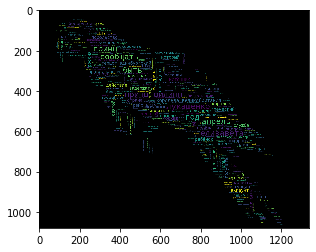

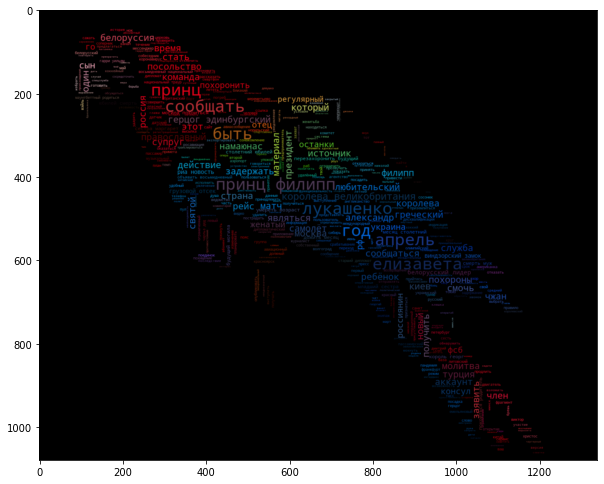

In [29]:
# Визуализация распределения слов в новости на русском языке (кусок кода с GitHub word_cloud)
import os
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = open(os.path.join(d, 'day_text.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

## Задание 3 (3 балла), hard уровень

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите программу с использованием модуля `Beautiful Soup`, которая извлекает данные из HTML-страницы и сохраняет их в файле формата CSV (подсказка [тут](https://colab.research.google.com/github/dm-fedorov/python_basic/blob/master/task_parsing_html.ipynb)).

In [24]:
# Создадим скрапер сайта через BeautifulSoup
def weather_parser():
    
    # Параметры запроса
    link = 'http://dfedorov.spb.ru/python3/forecast.html'
    headers = {
            'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0'
            }
    
    # Датафрейм для записи данных
    df = pd.DataFrame(columns =('Время', 'Прогноз'))

    # Создание запроса
    html = requests.get(link, headers=headers)
    
    # Получение 'тела' сайта
    if html.ok:
        soup = bs(html.text,'lxml')
        forecasts = soup.findChildren('div', {'class':"row row-forecast"})
        
        for i in forecasts:
            
            # Время
            time = i.find_next('div', {'class':'forecast-label'}).text

            # Прогноз
            forecast = i.find_next('div', {'class':'forecast-text'}).text
            
            # Запись в df
            df = df.append(
                {
                'Время': time,
                'Прогноз': forecast,
                },
                ignore_index=True,
                )

    return df

In [30]:
df = weather_parser()
df

,Время,Прогноз
0,Сегодня ночью,Небольшая вероятность ливней и гроз до 22:00. ...
1,Пятница,"Местами солнечно. Высоко около 77, с температу..."
2,Ночь пятницы,Облачно с прояснениями около 63. Северный вете...
3,Суббота,"В основном солнечно, с высокой температурой ок..."
4,Субботняя ночь,"Облачно с прояснениями, около 63. Ветер северн..."
5,Воскресенье,"В основном солнечно, с высотой около 73."
6,Воскресный вечер,Облачно с прояснениями около 64.
7,Понедельник,"Преимущественно солнечно, с высоким около 74."
8,Ночь понедельника,"В основном ясно, с низким около 65."
9,Вторник,"Солнечный, с высоким около 75."


In [31]:
# Запись Датафрейма в csv
df.to_csv(r'Weather forecast.csv', index = False, encoding='UTF-8')